In [131]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings as w
w.filterwarnings('ignore')

In [53]:
#importing the data frame
disease_df = pd.read_excel(r'C:\Users\USER\Downloads\Disease_Data.xlsx')

In [54]:
disease_df

,id,gender,state,settlement,report_date,report_year,age,date_of_birth,disease,health_status,report_outcome
0,1,Female,Rivers,Rural,2018-05-15 00:00:00,2018.0,32,1986-01-17 00:00:00,Cholera,alive,confirmed
1,2,Male,Ebonyi,Rural,2017-02-28 00:00:00,2017.0,32,1985-09-01 00:00:00,Marburg Virus,Alive,Confirmed
2,3,Female,Ogun,Urban,2012-03-02 00:00:00,2012.0,24,1988-05-01 00:00:00,Marburg Virus,dead,Not Confirmed
3,4,Female,Ondo,Rural,2010-05-21 00:00:00,NaN,63,1947-05-24 00:00:00,Measles,Alive,Not Confirmed
4,5,Male,Oyo,Urban,2017-08-28 00:00:00,2017.0,9,2008-01-07 00:00:00,Rubella Mars,Alive,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...
2461,2498,Male,Kaduna,Rural,2017-07-06 00:00:00,2017.0,57,1960-02-26 00:00:00,Viral Haemmorrhaphic Fever,Dead,Confirmed
2462,2499,Female,Adamawa,Rural,2010-04-20 00:00:00,2010.0,35,1975-06-14 00:00:00,Malaria,Alive,Confirmed
2463,2500,Female,Ekiti,Urban,2012-04-06 00:00:00,2012.0,53,1959-05-16 00:00:00,Measles,Dead,Confirmed
2464,6,Female,Kaduna,Rural,2012-06-27 00:00:00,2012.0,44,1968-06-06 00:00:00,Ebola,Alive,Confirmed


In [55]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2466 non-null   int64  
 1   gender          2466 non-null   object 
 2   state           2466 non-null   object 
 3   settlement      2466 non-null   object 
 4   report_date     2466 non-null   object 
 5   report_year     2462 non-null   float64
 6   age             2466 non-null   int64  
 7   date_of_birth   2466 non-null   object 
 8   disease         2466 non-null   object 
 9   health_status   2466 non-null   object 
 10  report_outcome  2466 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 212.1+ KB


### Observations
1. 2466 enteries and 11 columns
2. report_date and date_of_birth should be in datetime format and not object(string)
3. report_year has 4 nulls values

In [56]:
#Checking for duplicates
disease_df[disease_df.duplicated()]
# 5 duplicates found

,id,gender,state,settlement,report_date,report_year,age,date_of_birth,disease,health_status,report_outcome
28,27,Female,Adamawa,Urban,2018-11-17 00:00:00,2018.0,72,1946-07-02 00:00:00,Yellow Fever,Alive,Confirmed
29,28,Female,Kwara,Urban,2016-08-06 00:00:00,2016.0,7,2009-08-20 00:00:00,Viral Haemmorrhaphic Fever,Dead,Confirmed
2449,2483,Male,Rivers,Rural,2013-11-23 00:00:00,2013.0,19,1994-11-10 00:00:00,Diarrhoea,Dead,Not Confirmed
2450,2484,Female,Kebbi,Urban,2015-04-16 00:00:00,2015.0,46,1969-12-19 00:00:00,Malaria,Dead,Confirmed
2464,6,Female,Kaduna,Rural,2012-06-27 00:00:00,2012.0,44,1968-06-06 00:00:00,Ebola,Alive,Confirmed


In [57]:
disease_df.drop_duplicates(inplace=True)
# 5 duplicates dropped

In [58]:
disease_df.info()
#2461 enteries

<class 'pandas.core.frame.DataFrame'>
Index: 2461 entries, 0 to 2465
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2461 non-null   int64  
 1   gender          2461 non-null   object 
 2   state           2461 non-null   object 
 3   settlement      2461 non-null   object 
 4   report_date     2461 non-null   object 
 5   report_year     2457 non-null   float64
 6   age             2461 non-null   int64  
 7   date_of_birth   2461 non-null   object 
 8   disease         2461 non-null   object 
 9   health_status   2461 non-null   object 
 10  report_outcome  2461 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 230.7+ KB


In [59]:
# reseting index
disease_df.reset_index(inplace=True)

In [60]:
disease_df.drop(columns='index', inplace=True)

#### gender column

In [61]:
# Checking for inaccurate or inconsistent values
disease_df['gender'].unique()

array(['Female', 'Male', 'F', 'M'], dtype=object)

'F' and 'M' are inaccurate and should be replace with 'Female' and 'Male' respectively

In [62]:
disease_df['gender'].replace({'F':'Female', 'M':'Male'}, inplace=True)

In [63]:
#Confirming if the corrections has been made
disease_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

#### state column

In [64]:
# Checking for inaccurate or inconsistent values
disease_df['state'].unique()

array(['Rivers', 'Ebonyi', 'Ogun', 'Ondo', 'Oyo', 'Kaduna', 'Taraba',
       'Katsina', 'Osun', 'Niger', 'Cross River', 'Adamawa', 'Nasarawa',
       'Imo', 'Abia', 'Yobe', 'Delta', 'Jigawa', 'Borno', 'Kwara',
       'Bayelsa', 'Federal Capital Territory', 'Kogi', 'Gombe', 'Sokoto',
       'Anambra', 'Kebbi', 'Lagos', 'Plateau', 'Zamfara', 'Edo', 'Ekiti',
       'Enugu', 'Bauchi', 'Kano', 'Benue', 'Akwa Ibom'], dtype=object)

In [65]:
disease_df["state"].replace({"Federal Capital Territory":"FCT"},inplace= True)

In [66]:
#Confirming if the corrections has been made
disease_df['state'].unique()

array(['Rivers', 'Ebonyi', 'Ogun', 'Ondo', 'Oyo', 'Kaduna', 'Taraba',
       'Katsina', 'Osun', 'Niger', 'Cross River', 'Adamawa', 'Nasarawa',
       'Imo', 'Abia', 'Yobe', 'Delta', 'Jigawa', 'Borno', 'Kwara',
       'Bayelsa', 'FCT', 'Kogi', 'Gombe', 'Sokoto', 'Anambra', 'Kebbi',
       'Lagos', 'Plateau', 'Zamfara', 'Edo', 'Ekiti', 'Enugu', 'Bauchi',
       'Kano', 'Benue', 'Akwa Ibom'], dtype=object)

#### settlement column

In [67]:
# Checking for inaccurate or inconsistent values
disease_df['settlement'].unique()

array(['Rural', 'Urban', 'Rurale', 'Urbn'], dtype=object)

'Rurale' and 'Urbn' are inaccurate and should be replace with 'Rural' and 'Urban' respectively

In [68]:
disease_df['settlement'].replace({'Rurale':'Rural', 'Urbn':'Urban'}, inplace=True)

In [69]:
#Confirming if the corrections has been made
disease_df['settlement'].unique()

array(['Rural', 'Urban'], dtype=object)

#### report_date column

In [70]:
disease_df['report_date']== 0000-00-00

0       False
1       False
2       False
3       False
4       False
        ...  
2456    False
2457    False
2458    False
2459    False
2460    False
Name: report_date, Length: 2461, dtype: bool

In [71]:
# Change report_date from an object to a datetime format
disease_df['report_date'] = pd.to_datetime(disease_df['report_date'], errors='coerce')

In [72]:
#Confirming if the change has been effected
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              2461 non-null   int64         
 1   gender          2461 non-null   object        
 2   state           2461 non-null   object        
 3   settlement      2461 non-null   object        
 4   report_date     2460 non-null   datetime64[ns]
 5   report_year     2457 non-null   float64       
 6   age             2461 non-null   int64         
 7   date_of_birth   2461 non-null   object        
 8   disease         2461 non-null   object        
 9   health_status   2461 non-null   object        
 10  report_outcome  2461 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 211.6+ KB


#### report_year column

In [73]:
#Checking for null values in the report year
disease_df[disease_df['report_year'].isna()]

,id,gender,state,settlement,report_date,report_year,age,date_of_birth,disease,health_status,report_outcome
3,4,Female,Ondo,Rural,2010-05-21,NaN,63,1947-05-24 00:00:00,Measles,Alive,Not Confirmed
6,7,Female,Taraba,Rural,2010-04-01,NaN,61,1949-07-19 00:00:00,Yellow Fever,Alive,Confirmed
13,14,Male,Nasarawa,Rural,2016-11-19,NaN,3,2013-05-12 00:00:00,Ebola,Alive,Not Confirmed
37,39,Female,Kaduna,Rural,2010-04-02,NaN,66,1944-01-02 00:00:00,Malaria,Dead,Confirmed


In [76]:
#filling in the blank spaces
for i in disease_df[disease_df['report_year'].isna()].index:
    disease_df.loc[i,'report_year'] = disease_df.loc[i,'report_date'].year

In [77]:
#Confirming if the blank spaces has been filled
disease_df.loc[[3,6,13,37],'report_year']

3     2010.0
6     2010.0
13    2016.0
37    2010.0
Name: report_year, dtype: float64

In [79]:
#Changing the float to int in the report_year column
disease_df['report_year']=disease_df['report_year'].astype('int')

In [82]:
disease_df['report_year'].dtype

dtype('int32')

#### date_of_birth column

In [85]:
#Chnaging the date_of_birth from object to a datetime format
disease_df['date_of_birth']=pd.to_datetime(disease_df['date_of_birth'], errors='coerce')

In [87]:
#checking for inconsistent rows
inconsistent_rows= disease_df['date_of_birth'] > disease_df['report_date']

In [89]:
disease_df[inconsistent_rows]

,id,gender,state,settlement,report_date,report_year,age,date_of_birth,disease,health_status,report_outcome
15,16,Female,Imo,Urban,2012-08-23,2012,2,2015-06-21,Meningitis,Alive,Not Confirmed
29,30,Female,Yobe,Urban,2014-11-11,2014,7,2018-04-19,Marburg Virus,Alive,Confirmed
43,45,Female,Osun,Rural,2012-02-02,2012,3,2016-05-06,Yellow Fever,Dead,Confirmed
44,46,Female,Kebbi,Rural,2013-08-30,2013,4,2013-12-10,Cholera,Dead,Not Confirmed
82,86,Female,Jigawa,Urban,2010-12-26,2010,3,2017-09-26,Viral Haemmorrhaphic Fever,Dead,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...
2392,2430,Female,Bayelsa,Rural,2013-10-10,2013,2,2015-12-12,Measles,Alive,Confirmed
2409,2449,Male,Nasarawa,Urban,2014-12-25,2014,3,2015-09-23,Ebola,Dead,Not Confirmed
2414,2454,Female,Kano,Rural,2010-09-17,2010,3,2014-12-27,Ebola,Dead,Confirmed
2416,2456,Male,Adamawa,Rural,2010-02-27,2010,6,2011-08-15,Ebola,Dead,Not Confirmed


In [94]:
#correcting the inconsistent rows
for i in disease_df[inconsistent_rows].index:
    year= str(disease_df.loc[i,'report_year'] - disease_df.loc[i,'age'])
    month= str(disease_df.loc[i,'date_of_birth'].month)
    day = str(disease_df.loc[i,'date_of_birth'].day)
    update= year + '-'+month+'-'+day
    disease_df.loc[i,'date_of_birth'] = pd.to_datetime(update)

In [97]:
#Confirming the correction
disease_df[disease_df['date_of_birth'] > disease_df['report_date']]

,id,gender,state,settlement,report_date,report_year,age,date_of_birth,disease,health_status,report_outcome


#### disease column

In [100]:
#Checking for inconsistency and inaccuracy
disease_df['disease'].unique()

array(['Cholera', 'Marburg Virus', 'Measles', 'Rubella Mars', 'Ebola',
       'Yellow Fever', 'Diarrhoea', 'Meningitis', 'Malaria',
       'Viral Haemmorrhaphic Fever'], dtype=object)

In [101]:
disease_df['disease'].replace({'Viral Haemmorrhaphic Fever':'VHF'}, inplace=True)

In [102]:
#Confirming if the corrections has been made
disease_df['disease'].unique()

array(['Cholera', 'Marburg Virus', 'Measles', 'Rubella Mars', 'Ebola',
       'Yellow Fever', 'Diarrhoea', 'Meningitis', 'Malaria', 'VHF'],
      dtype=object)

#### health_status column

In [104]:
#Checking for inconsistency and inaccuracy
disease_df['health_status'].unique()

array(['alive', 'Alive', 'dead', 'Dead'], dtype=object)

In [107]:
disease_df['health_status'].replace({'alive':'Alive', 'dead':'Dead'}, inplace=True)

In [108]:
#Confirming if the corrections has been made
disease_df['health_status'].unique()

array(['Alive', 'Dead'], dtype=object)

#### report_outcome column

In [110]:
#Checking for inconsistency and inaccuracy
disease_df['report_outcome'].unique()

array(['confirmed', 'Confirmed', 'Not Confirmed', 'Not confirmed'],
      dtype=object)

In [112]:
disease_df['report_outcome'].replace({'confirmed':'Confirmed', 'Not confirmed':'Not Confirmed'}, inplace=True)

In [113]:
#Confirming if the corrections has been made
disease_df['report_outcome'].unique()

array(['Confirmed', 'Not Confirmed'], dtype=object)

## Analysis

1. Which states has the highest incidence of Malaria and Cholera?
2. Which State has the highest death rate due to Cholera?
3. Which group do we have the highest disease occurrence, rural or urban?
4. Which diseases has the highest death rate in 2010 and 2018?
5. Which year do we have highest incidence of Meningitis? b. Which Age group are more perceptible to Diarrhoea?

In [147]:
cholera = disease_df['disease'].isin(['Cholera'])
malaria = disease_df['disease'].isin(['Malaria'])

Text(0.5, 1.0, 'Incidence of Malaria and Cholera by States')

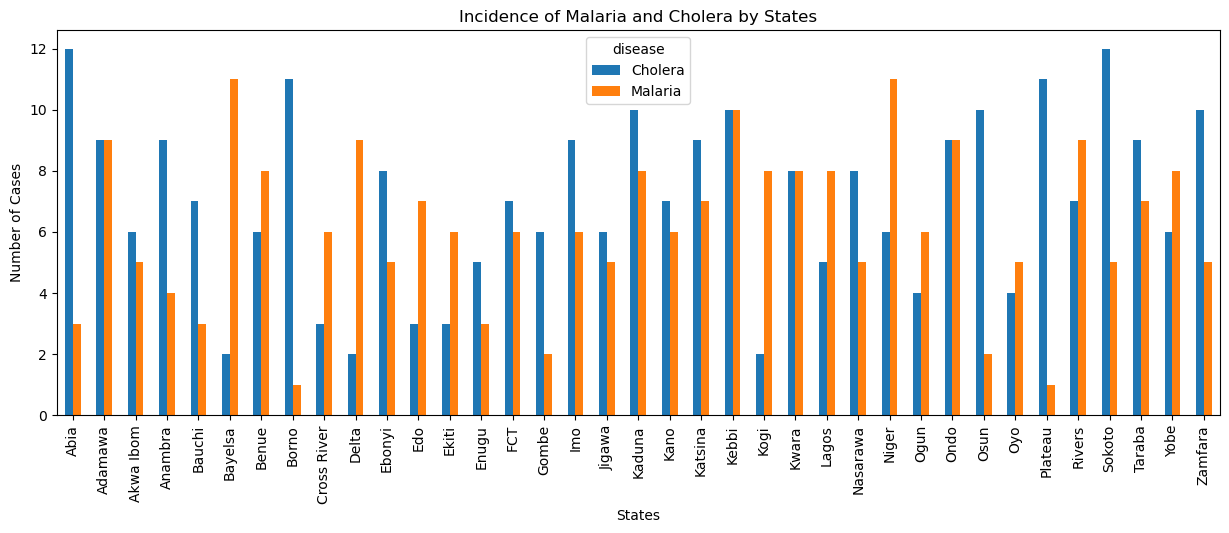

In [178]:
#Which states has the highest incidence of Malaria and Cholera?
malaria_cholera_df = disease_df['disease'].isin(['Malaria', 'Cholera'])
malaria_cholera_df = disease_df[malaria_cholera_df]
pd.crosstab(malaria_cholera_df['state'], malaria_cholera_df['disease']).plot(kind='bar', figsize=(15,5))

plt.ylabel('Number of Cases')
plt.xlabel('States')
plt.title('Incidence of Malaria and Cholera by States')


Text(0.5, 1.0, 'Number of deaths by Cholera in various States')

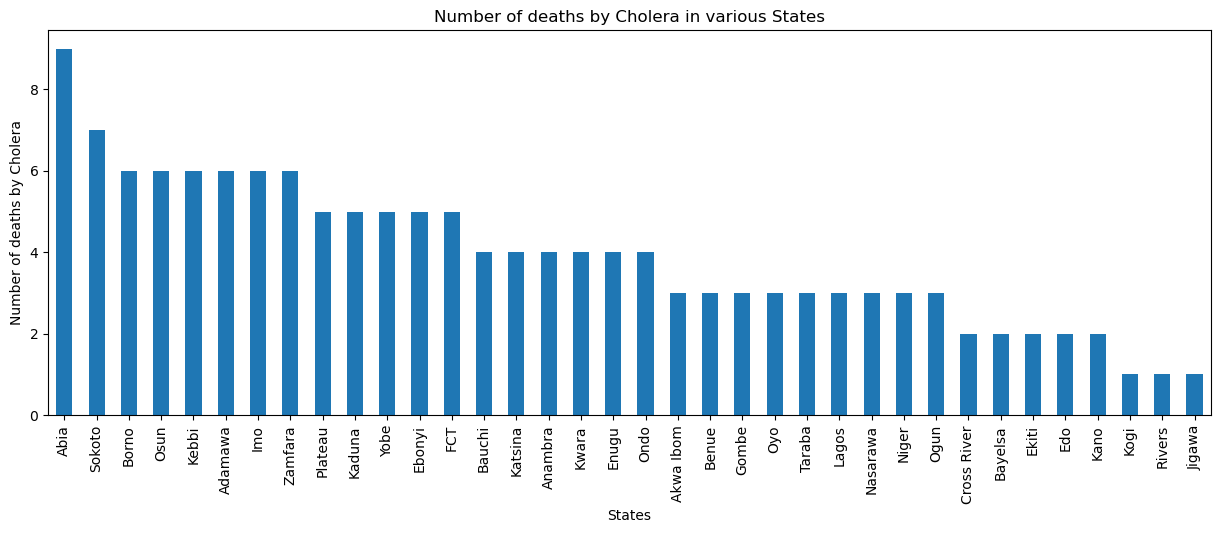

In [184]:
#Which State has the highest death rate due to Cholera?
cholera_df=disease_df[disease_df['disease']=='Cholera']
dead_cholera_df=cholera_df[cholera_df['health_status']=='Dead']
dead_cholera_df.groupby('state')['health_status'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,5))

plt.ylabel('Number of deaths by Cholera')
plt.xlabel('States')
plt.title('Number of deaths by Cholera in various States')

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

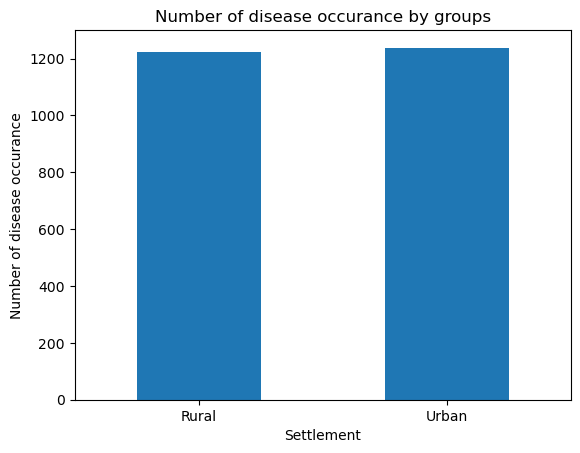

In [186]:
#Which group do we have the highest disease occurrence, rural or urban?
disease_df.groupby('settlement')['disease'].count().plot(kind='bar')

plt.ylabel('Number of disease occurance')
plt.xlabel('Settlement')
plt.title('Number of disease occurance by groups')
plt.xticks(rotation=0)

<Axes: xlabel='disease'>

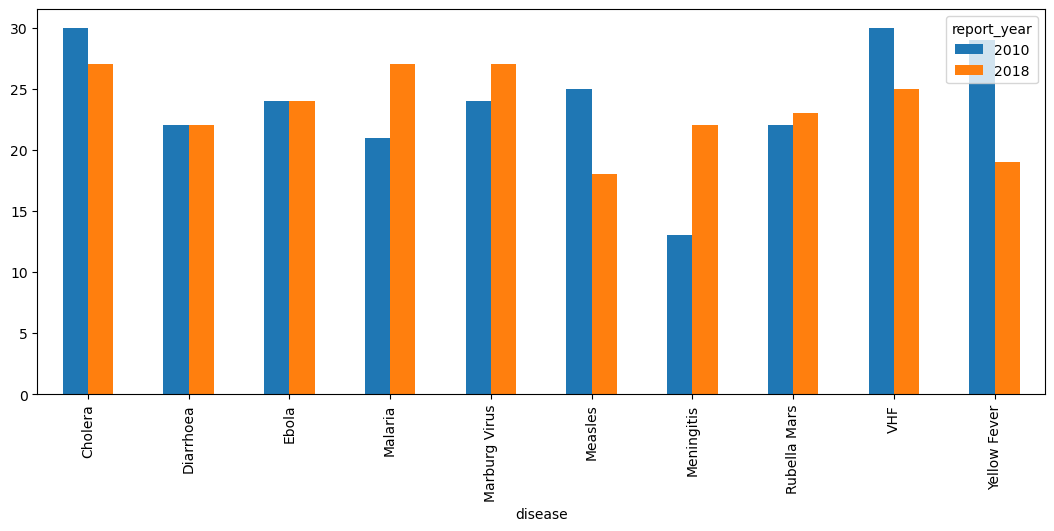

In [199]:
#Which diseases has the highest death rate in 2010 and 2018?
d_df=disease_df[disease_df['report_year'].isin([2010,2018])]
pd.crosstab(d_df['disease'], d_df['report_year']).plot(kind='bar', figsize=(13,5))


TypeError: tuple indices must be integers or slices, not tuple

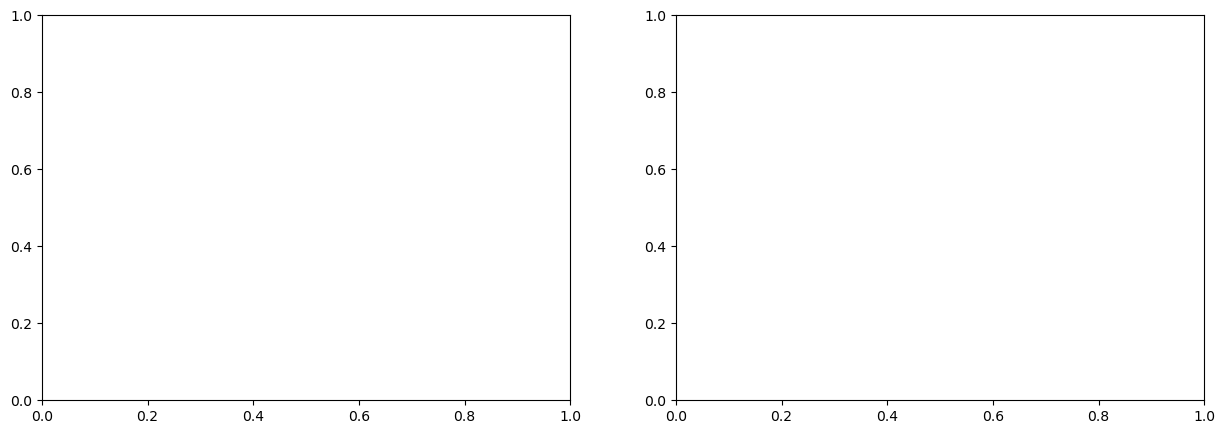

In [208]:
d_df_10=d_df[d_df['report_year']==2010].groupby('disease')['report_year'].count()
d_df_18=d_df[d_df['report_year']==2018].groupby('disease')['report_year'].count()

axes=plt.subplots(1,2, figsize=(15,5))

d_df_10.plot(ax=axes[0,0], kind='bar')
d_df_18.plot(ax=axes[0,1], kind='bar')

<Axes: xlabel='report_year'>

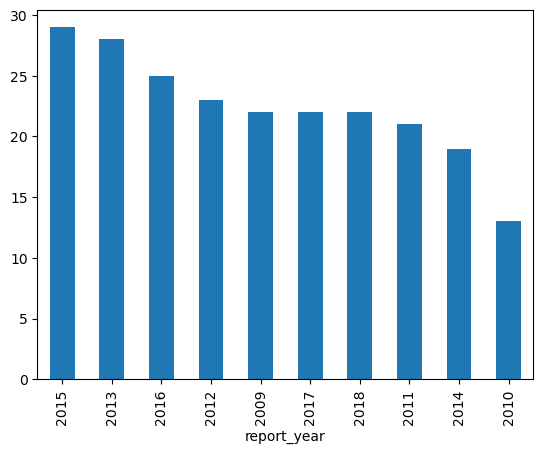

In [210]:
#Which year do we have highest incidence of Meningitis?
disease_df[disease_df['disease']=='Meningitis'].groupby('report_year')['disease'].count().sort_values(ascending=False).plot(kind='bar')

In [ ]:
#b. Which Age group are more perceptible to Diarrhoea?
disease_df[disease_df['disease']=='Diarrhoea'].groupby('age')['disease'].count

In [216]:
disease_df['age_bracket'] = pd.cut(disease_df.age, bins=[0,20,30,40,50,float('inf')],labels=['Teenager', 'Young Adult', 'Adult', 'Middle Age', 'Old'])

In [217]:
disease_df

,id,gender,state,settlement,report_date,report_year,age,date_of_birth,disease,health_status,report_outcome,age_bracket
0,1,Female,Rivers,Rural,2018-05-15,2018,32,1986-01-17,Cholera,Alive,Confirmed,Adult
1,2,Male,Ebonyi,Rural,2017-02-28,2017,32,1985-09-01,Marburg Virus,Alive,Confirmed,Adult
2,3,Female,Ogun,Urban,2012-03-02,2012,24,1988-05-01,Marburg Virus,Dead,Not Confirmed,Young Adult
3,4,Female,Ondo,Rural,2010-05-21,2010,63,1947-05-24,Measles,Alive,Not Confirmed,Old
4,5,Male,Oyo,Urban,2017-08-28,2017,9,2008-01-07,Rubella Mars,Alive,Confirmed,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2497,Female,Katsina,Urban,2013-02-05,2013,7,2006-09-15,Yellow Fever,Dead,Not Confirmed,Teenager
2457,2498,Male,Kaduna,Rural,2017-07-06,2017,57,1960-02-26,VHF,Dead,Confirmed,Old
2458,2499,Female,Adamawa,Rural,2010-04-20,2010,35,1975-06-14,Malaria,Alive,Confirmed,Adult
2459,2500,Female,Ekiti,Urban,2012-04-06,2012,53,1959-05-16,Measles,Dead,Confirmed,Old
